In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pwd

/Users/tomrix/Library/CloudStorage/OneDrive-ImperialCollegeLondon/projects/TopologicalChaos/notebooks


In [2]:
input_df = pd.read_csv('../data/raw/phili_mock.csv')
print(input_df.columns)
input_df

Index(['chrom_peak_id', 'mzmin', 'mzmax', 'rtmin', 'rtmax', 'into',
       'target_ChEBI.name', 'target_ChEBI', 'target_InChIKey',
       'target_formula', 'target_M', 'adduct', 'mixture', 'ms1_adduct_count',
       'ms1_adduct_05_count', 'isopeak_count', 'isopeak_sim', 'ms2_count',
       'ms2_matched_count', 'ms2_true_count', 'RTI', 'rt_regions', 'rtmed',
       'mzmed', 'number_of_peaks', 'T/F', 'Comment'],
      dtype='object')


,chrom_peak_id,mzmin,mzmax,rtmin,rtmax,into,target_ChEBI.name,target_ChEBI,target_InChIKey,target_formula,...,ms2_count,ms2_matched_count,ms2_true_count,RTI,rt_regions,rtmed,mzmed,number_of_peaks,T/F,Comment
0,CP091627|CP011072|CP011057|CP091285,219.076767,219.077334,37.320245,50.323330,57697.938810,5-hydroxy-L-tryptophan,CHEBI:17780,LDCYZAJDBXYCGN-VIFPVBQESA-N,C11H12N2O3,...,19,2,2,248.991092970096|320.470352434631|323.61734689...,1,41.053025,237.081081,4,True,NaN
1,CP012078,221.115755,221.117095,470.976884,477.914352,1297.980443,5-hydroxy-L-tryptophan,CHEBI:17780,LDCYZAJDBXYCGN-VIFPVBQESA-N,C11H12N2O3,...,1,0,0,1514.698531,2,474.626372,221.116646,1,False,NaN
2,CP011999,221.115522,221.117270,447.048864,451.700106,1282.212843,5-hydroxy-L-tryptophan,CHEBI:17780,LDCYZAJDBXYCGN-VIFPVBQESA-N,C11H12N2O3,...,1,0,0,1410.086911,3,449.041215,221.116748,1,False,NaN
3,CP010717|CP091014,282.034894,282.035187,21.730090,29.844128,56967.693530,alpha-D-glucosamine 6-phosphate,CHEBI:15873,XHMJOUIAFHJHBW-UKFBFLRUSA-N,C6H14NO8P,...,8,3,2,0|0,1,24.009871,270.036198,2,True,NaN
4,CP090384|CP090624|CP090683,387.112947,387.114477,23.373053,34.239232,6457.844628,alpha-D-glucosyl-(1->4)-alpha-D-mannose,CHEBI:47937,GUBGYTABKSRVRQ-DKBJLJRDSA-N,C12H22O11,...,4,1,0,0|0|128.736544246097,1,26.957945,356.454871,3,NaN,EIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,CP196697,313.164108,313.171168,524.529707,555.579277,18982.103300,progesterone,CHEBI:17026,RJKFOVLPORLFTN-LEKSSAKUSA-N,C21H30O2,...,2,0,0,1739.444762,7,528.794936,313.167034,1,NaN,NaN
1189,CP179959|CP076837|CP076742,185.154246,185.154900,461.438040,468.529795,38564.088630,undecanoic acid,CHEBI:32368,ZDPHROOEEOARMN-UHFFFAOYSA-N,C11H22O2,...,15,0,0,1473.87425129767|1469.5063298577|1469.5063298577,1,464.036945,193.820250,3,NaN,NaN
1190,CP075066,209.121521,209.122137,107.431815,121.473574,11953.530600,undecanoic acid,CHEBI:32368,ZDPHROOEEOARMN-UHFFFAOYSA-N,C11H22O2,...,7,0,0,465.4380227,2,111.385262,209.121840,1,NaN,NaN
1191,CP076113,209.188664,209.189228,398.585001,403.381000,885.821026,undecanoic acid,CHEBI:32368,ZDPHROOEEOARMN-UHFFFAOYSA-N,C11H22O2,...,2,0,0,1212.13338,3,400.645044,209.189046,1,NaN,NaN


In [3]:
print('CHEBI')
print(f'Number of NAs: {input_df['target_ChEBI'].isna().sum()}')
print(f'Number of unique values: {input_df["target_ChEBI"].nunique()}')
print(f'Number of unique values: {input_df["target_ChEBI.name"].nunique()}')

print()
print('T/F col')
print(input_df['T/F'].value_counts(dropna=False))

CHEBI
Number of NAs: 0
Number of unique values: 322
Number of unique values: 327

T/F col
T/F
NaN      1147
False      28
True       18
Name: count, dtype: int64


In [4]:
# def extract_identified_df(df):
#     """ Ignoring additional information on quality of the identification, just T/F"""

#     chebi_ids = df['target_ChEBI'].str.replace('CHEBI:', '', regex=False).values

#     # TODO: handle NaN values in T/F

#     # TODO: remove duplicate chebis

#     return pd.DataFrame({
#         'target_ChEBI': chebi_ids,
#         'T/F': df['T/F']
#     })

# extract_identified_df(input_df)

In [22]:
chebis = set(input_df['target_ChEBI'].str.replace('CHEBI:', '', regex=False).values)


# Generate a random sample of 0s and 1s (Bernoulli distribution) for each chebi
assay1 = np.random.binomial(n=1, p=0.75, size=len(chebis))
assay2 = np.random.binomial(n=1, p=0.6, size=len(chebis))
assay3 = np.random.binomial(n=1, p=0.35, size=len(chebis))
assay4 = np.random.binomial(n=1, p=0.45, size=len(chebis))

df = pd.DataFrame({
    'assay1': assay1,
    'assay2': assay2,
    'assay3': assay3,
    'assay4': assay4
}, index=list(chebis))
df



,assay1,assay2,assay3,assay4
27480,0,1,1,0
16533,1,0,1,1
16908,1,1,0,0
52023,1,0,1,1
28871,1,0,0,1
...,...,...,...,...
77391,0,1,0,1
88868,0,0,0,0
44510,1,1,0,0
60645,1,0,1,0


<Axes: >

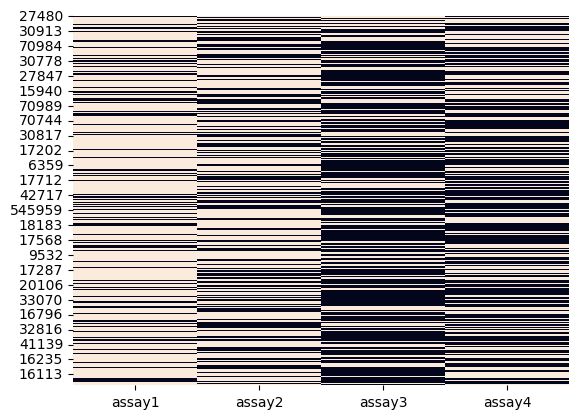

In [23]:
sns.heatmap(df, cbar=False)

In [24]:
refmet = pd.read_csv('../data/refmet.csv', index_col=0, dtype='object')
refmet

,refmet_name,super_class,main_class,sub_class,formula,exactmass,pubchem_cid,chebi_id,hmdb_id,lipidmaps_id,kegg_id,inchi_key
refmet_id,,,,,,,,,,,,
RM0108606,Acutumidine,Alkaloids,Alkaloids,Other alkaloids,C18H22ClNO6,383.113567,442840,2452,NaN,NaN,C10565,SBALNGLYQFMKPR-NQTWQHAWSA-N
RM0108637,Adifoline,Alkaloids,Alkaloids,Other alkaloids,C22H20N2O7,424.127053,441972,2488,NaN,NaN,C09020,DJWXVEDJWPDUBQ-DEALGVFLSA-N
RM0056144,Adlumine,Alkaloids,Alkaloids,Other alkaloids,C21H21NO6,383.136889,442155,9,NaN,NaN,C09324,SZDGAZFTAUFFQH-OALUTQOASA-N
RM0013252,Affinine,Alkaloids,Alkaloids,Other alkaloids,C20H24N2O2,324.183778,5281345,2502,NaN,NaN,C09021,PXFBZOLANLWPMH-SMLHJDAJSA-N
RM0108666,Agroclavine,Alkaloids,Alkaloids,Other alkaloids,C16H18N2,238.146999,73484,2519,NaN,NaN,NaN,XJOOMMHNYOJWCZ-UKRRQHHQSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...
RM0166258,ST 29:5;O2,Sterol Lipids,Sterols(In silico),Sterols(In silico),C29H42O2,422.318480,NaN,NaN,NaN,NaN,NaN,NaN
RM0166260,ST 29:6;O,Sterol Lipids,Sterols(In silico),Sterols(In silico),C29H40O,404.307915,NaN,NaN,NaN,NaN,NaN,NaN
RM0166257,ST 29:6;O2,Sterol Lipids,Sterols(In silico),Sterols(In silico),C29H40O2,420.302830,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
df_with_class = pd.merge(df, refmet[['chebi_id', 'super_class', 'main_class', 'sub_class']], left_index=True, right_on='chebi_id', how='inner')
df_with_class

,assay1,assay2,assay3,assay4,chebi_id,super_class,main_class,sub_class
refmet_id,,,,,,,,
RM0012731,0,1,1,0,27480,Organic acids,Amino acids and peptides,Amino acids
RM0136740,1,0,1,1,16533,Alkaloids,Tryptophan alkaloids,Tryptamines
RM0136399,1,1,0,0,16908,Nucleic acids,Nicotinamides,Nicotinamide dinucleotides
RM0135802,1,0,1,1,52023,Sterol Lipids,Bile acids,C24 Bile acids
RM0136159,1,0,0,1,28871,Nucleic acids,Purines,Aminopurines
...,...,...,...,...,...,...,...,...
RM0132215,1,0,1,1,35704,Organic acids,Amino acids and peptides,Amino acids
RM0135912,1,1,0,1,15729,Organic acids,Amino acids and peptides,Amino acids
RM0087240,0,1,0,1,77391,Glycerolipids,Triradylglycerols,TAG


In [40]:
count_df = df_with_class.groupby(['super_class', 'main_class'])[['assay1', 'assay2', 'assay3', 'assay4']].sum()
count_df



assay1  assay2  \
super_class                  main_class                                       
Alkaloids                    Anthranilic acid alkaloids           2       1   
                             Histidine alkaloids                  4       2   
                             Ornithine alkaloids                  1       1   
                             Pyridine alkaloids                   9       9   
                             Tryptophan alkaloids                10       4   
                             Tyrosine alkaloids                   4       3   
Benzenoids                   Benzamides                           1       1   
                             Benzenes                             7      10   
                             Diarylethers                         1       0   
                             Phenols                              1       1   
Carbohydrates                Disaccharides                        1       0   
                             Monosaccharides                      9       6   
                             Oligosaccharides                     1       1   
Fatty Acyls                  Fatty acids                         24      18   
                             Fatty alcohols                       0       1   
                             Fatty aldehydes                      2       2   
                             Fatty amides                         1       1   
                             Fatty esters                         1       0   
Glycerolipids                Monoradylglycerols                   1       1   
                             Triradylglycerols                    1       2   
Glycerophospholipids         Glycerophosphocholines               3       1   
Nucleic acids                Nicotinamides                        1       1   
                             Purines                             14       9   
                             Pyrimidines                         13      10   
Organic acids                Amino acids and peptides            58      40   
                             Carboxylic acids                     2       2   
                             Keto acids                           0       1   
                             Organic phosphoric acids             1       1   
                             Phenylpropanoids                     6       6   
                             Phosphate esters                     1       1   
                             Short-chain acids                    2       2   
                             Sulfonic acids                       1       1   
                             TCA acids                            3       3   
Organic nitrogen compounds   Amines                               0       1   
                             Carnitines                           1       1   
                             Cholines                             1       1   
                             Organonitrogen compounds             1       1   
Organic oxygen compounds     Alcohols and polyols                 1       0   
Organoheterocyclic compounds Alloxazines and isoalloxazines       0       1   
                             Azoles                               1       1   
                             Benzimidazoles                       1       1   
                             Bilirubins                           0       1   
                             Furoic acids                         1       1   
                             Heterocyclic compounds               1       0   
                             Lipoic acids                         1       1   
                             Pterins                              2       2   
                             Pyrrolidones                         0       2   
Organosulfur compounds       Organosulfur compounds               1       0   
Polyketides                  Flavonoids                           1       1   
Prenol Lipids                Iso

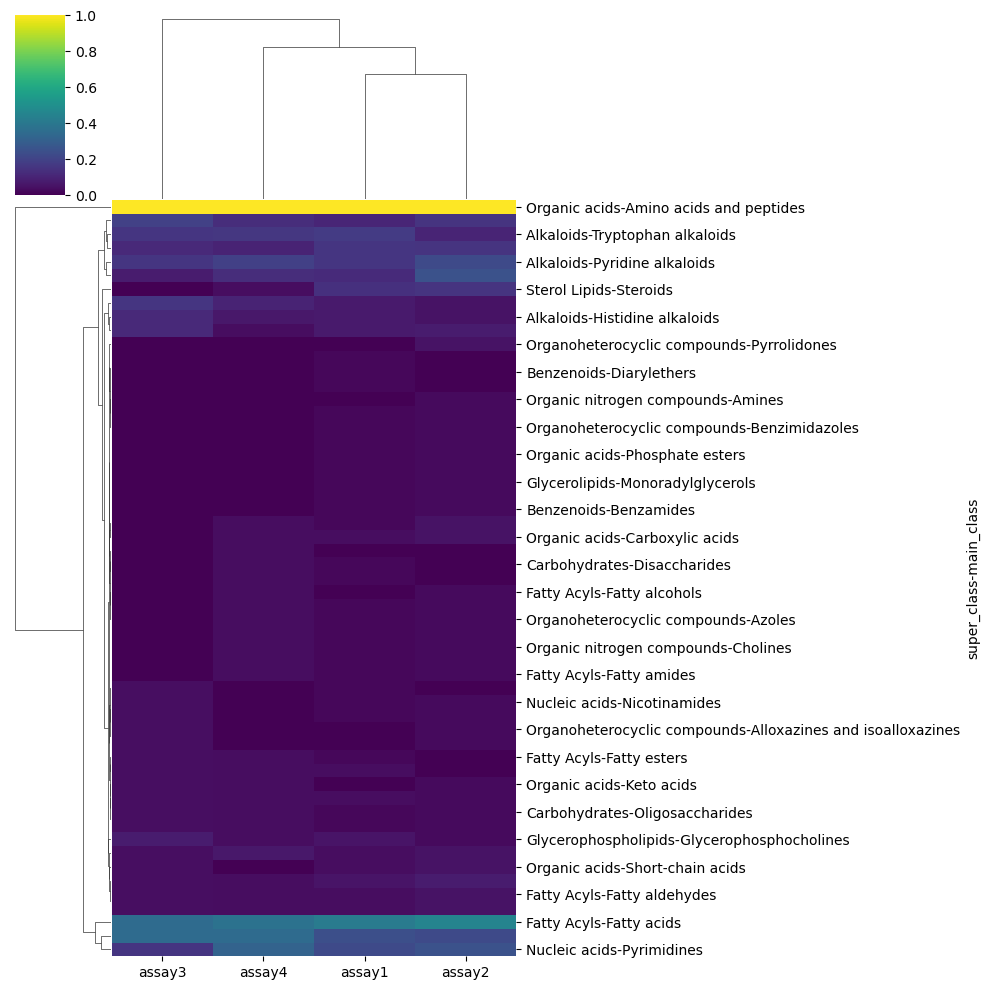

In [41]:
sns.clustermap(count_df, cmap='viridis', figsize=(10, 10), standard_scale=1)

In [42]:
grouped = df_with_class.groupby('main_class')
assay_sums = grouped[['assay1', 'assay2', 'assay3', 'assay4']].sum()
group_sizes = grouped.size()

normalized = assay_sums.div(group_sizes, axis=0)

normalized


,assay1,assay2,assay3,assay4
main_class,,,,
Alcohols and polyols,1.000000,0.000000,0.000000,0.000000
Alloxazines and isoalloxazines,0.000000,1.000000,1.000000,0.000000
Amines,0.000000,1.000000,0.000000,0.000000
Amino acids and peptides,0.773333,0.533333,0.346667,0.426667
Anthranilic acid alkaloids,1.000000,0.500000,0.500000,0.500000
Azoles,1.000000,1.000000,0.000000,1.000000
Benzamides,1.000000,1.000000,0.000000,0.000000
Benzenes,0.583333,0.833333,0.166667,0.333333
Benzimidazoles,1.000000,1.000000,0.000000,0.000000


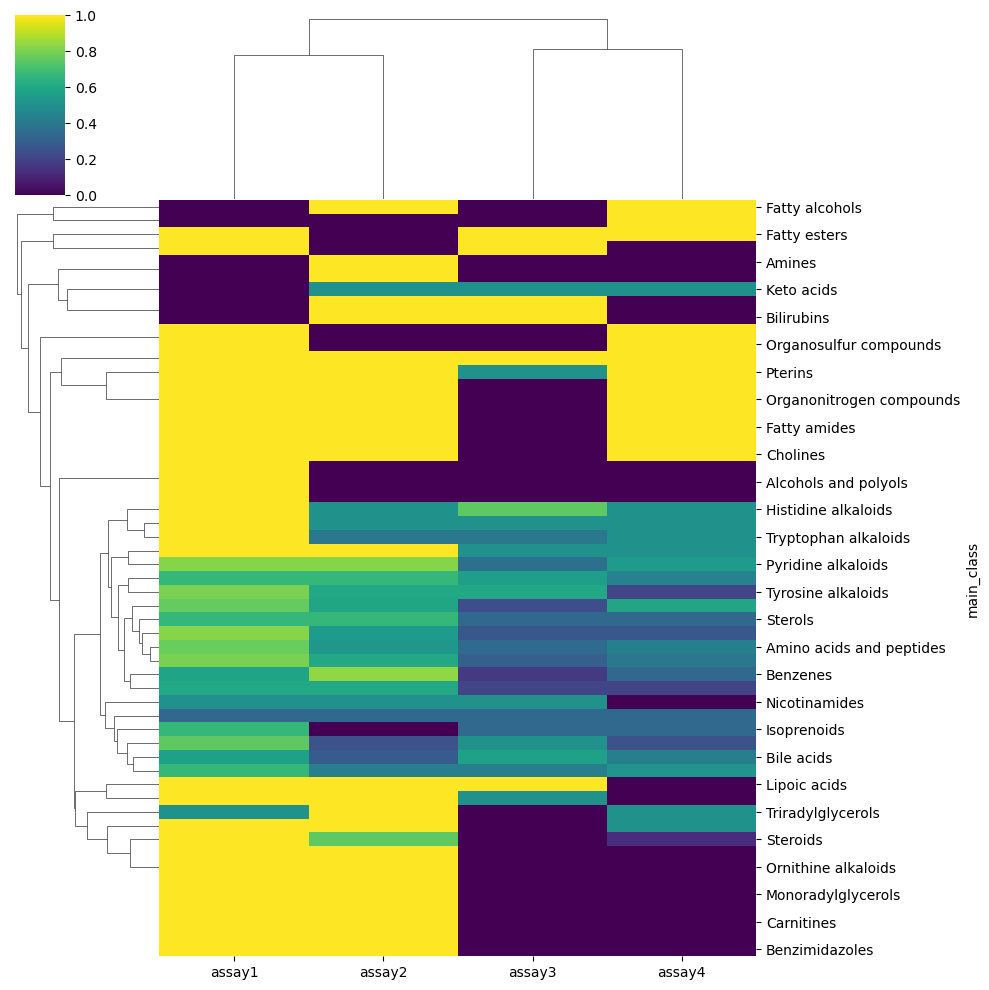

In [43]:
sns.clustermap(normalized, cmap='viridis', figsize=(10, 10))

In [51]:
refmet['super_class'].unique()

array(['Alkaloids', 'Benzenoids', 'Carbohydrates', 'Fatty Acyls',
       'Glycerolipids', 'Glycerophospholipids', 'Inorganic compounds',
       'Lignans', 'Nucleic acids', 'Organic acids',
       'Organic nitrogen compounds', 'Organic oxygen compounds',
       'Organohalogen compounds', 'Organoheterocyclic compounds',
       'Organometallic compounds', 'Organosulfur compounds',
       'Polyketides', 'Prenol Lipids', 'Sphingolipids', 'Sterol Lipids'],
      dtype=object)